In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../titanic_files/train.csv")
df_test = pd.read_csv("../titanic_files/test.csv")
df_gender_sub = pd.read_csv("../titanic_files/gender_submission.csv")

In [3]:
df_train.describe()
df_train.info()
#df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
for cols in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
    print(np.unique(df_train[df_train[cols].notnull()][cols]))

[0 1]
[1 2 3]
['female' 'male']
[0 1 2 3 4 5 8]
[0 1 2 3 4 5 6]
['C' 'Q' 'S']


# PassengerId, Name , Ticket and Cabin are ignored
# Age, Pclass , Fare , SibSp , Parch are numerics
# Sex , Embarked are objects
# Age and Fare are continous. rest all are categorical

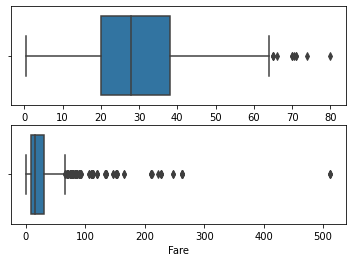

In [6]:
fig , ax = plt.subplots(2)
i=0
for cols in ['Age','Fare']:
    sns.boxplot(data=df_train, x=cols , ax=ax[i])
    i+=1
plt.show()

#Removing the outliers

In [7]:
df_train = df_train[df_train['Fare'] < 300]

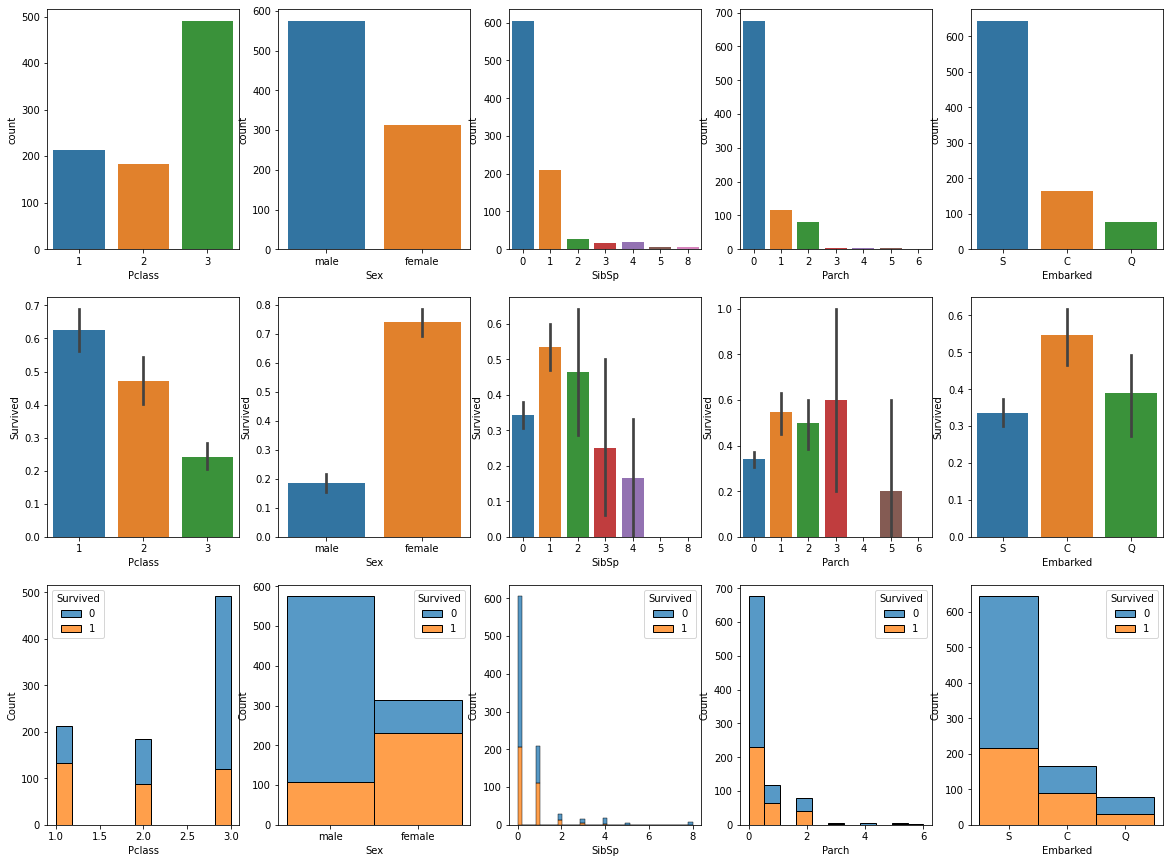

In [8]:
fig , ax = plt.subplots(3,5,figsize=(20,15))
j=0
for cols in ['Pclass','Sex','SibSp','Parch','Embarked']:
    sns.countplot(data=df_train , x=cols , ax = ax[0,j])
    sns.barplot(data=df_train, x=cols, y='Survived', ax=ax[1,j])
    sns.histplot(data=df_train, x = cols , hue = 'Survived', multiple = 'stack' ,  ax=ax[2,j])
    j += 1
plt.show()

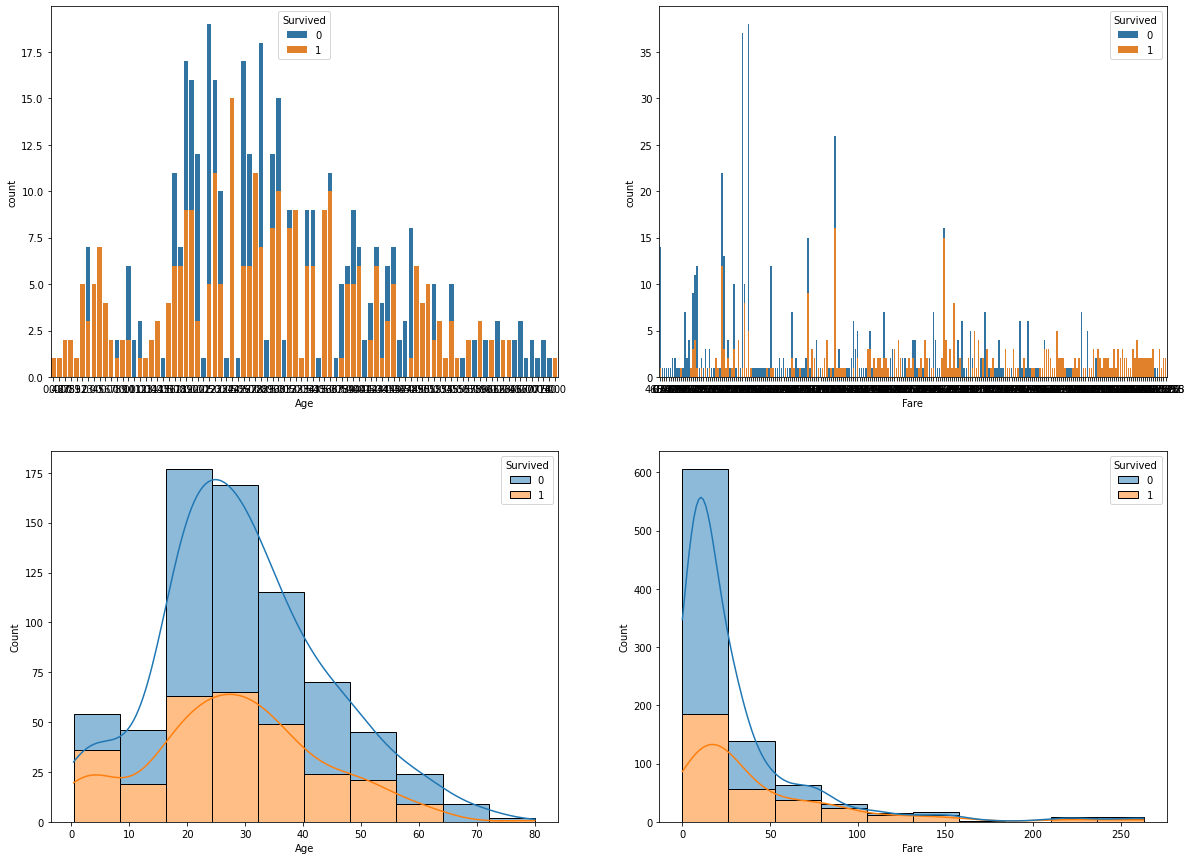

In [9]:
fig , ax = plt.subplots(2,2,figsize=(20,15))
j=0
for cols in ['Age','Fare']:
    sns.countplot(data=df_train,x= cols, hue='Survived', ax = ax[0,j] , dodge=False)
    sns.histplot(data=df_train, x = cols, hue='Survived', bins=10, multiple = 'stack', kde='True' ,ax=ax[1,j])
    j+=1
plt.show()

<AxesSubplot:>

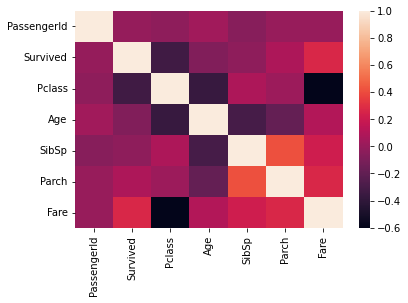

In [10]:
sns.heatmap(df_train.corr())

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

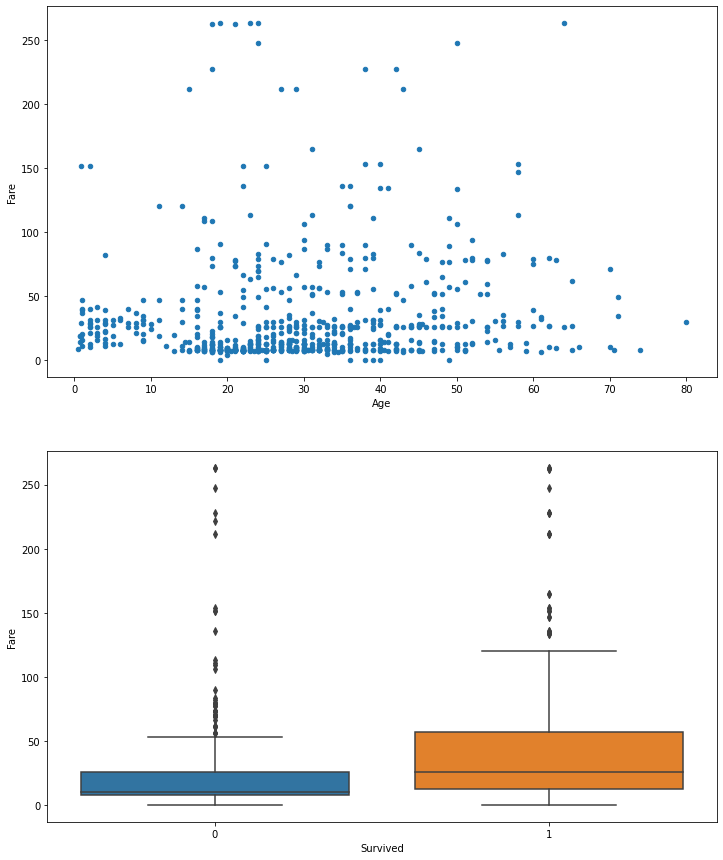

In [11]:
fig , ax = plt.subplots(2 , figsize=(12,15))
df_train.plot.scatter(x='Age',y='Fare', ax = ax[0])
sns.boxplot(data=df_train , x = 'Survived' , y = 'Fare' , ax = ax[1])

In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

#Filling the null values

In [13]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())
df_train.Embarked = df_train.Embarked.fillna(method='ffill')

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['Sex','Embarked']),
    remainder='passthrough')

pip = make_pipeline(col_trans,LinearRegression())

In [15]:
X, y = df_train[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']],df_train['Survived']

In [16]:
model = pip.fit(X,y)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
df_test.Age = pd.to_numeric(df_test.Age , errors = 'coerce')
df_test.Age = df_test.Age.fillna(df_test.Age.mean())

In [24]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())

In [30]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']

preds = model.predict(df_test[columns])

In [28]:
count = 0
for i in range(0,len(preds)):
    if(int(preds[i]) == df_gender_sub.iloc[i,1]):
        count += 1
print("correct count is ", count, "among total test of", len(preds))

correct count is  274 among total test of 418


In [31]:
df_test_results = df_test[['PassengerId']]

In [32]:
preds = preds.astype(int)

In [33]:
df_test_results['Survived'] = preds

C:\Users\vamba\AppData\Local\Temp\ipykernel_13756\765488713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_results['Survived'] = preds


In [ ]:
df_test_results.to_csv('./kaggle-titanic/Titanic_test_results.csv', index=False)